In [2]:
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding
from matplotlib.pyplot import *
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


import numpy as np # linear algebra

from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model
import pandas as pd

import keras
import tensorflow as tf
import keras.backend as K
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense
from keras.optimizers import Adam

from sklearn.neighbors import NearestNeighbors 
from sklearn import datasets, neighbors

Using TensorFlow backend.


In [3]:
import scipy.io
lsun = scipy.io.loadmat('FCPS/Lsun.mat')
atom = scipy.io.loadmat('FCPS/Atom.mat')
chain = scipy.io.loadmat('FCPS/Chainlink.mat')
engy = scipy.io.loadmat('FCPS/EngyTime.mat')
hepta = scipy.io.loadmat('FCPS/Hepta.mat')
target = scipy.io.loadmat('FCPS/Target.mat')
tetra = scipy.io.loadmat('FCPS/Tetra.mat')
lsun = scipy.io.loadmat('FCPS/Lsun.mat')
twoDiamons = scipy.io.loadmat('FCPS/TwoDiamonds.mat')
wingNut = scipy.io.loadmat('FCPS/WingNut.mat')

### Explore Datasets

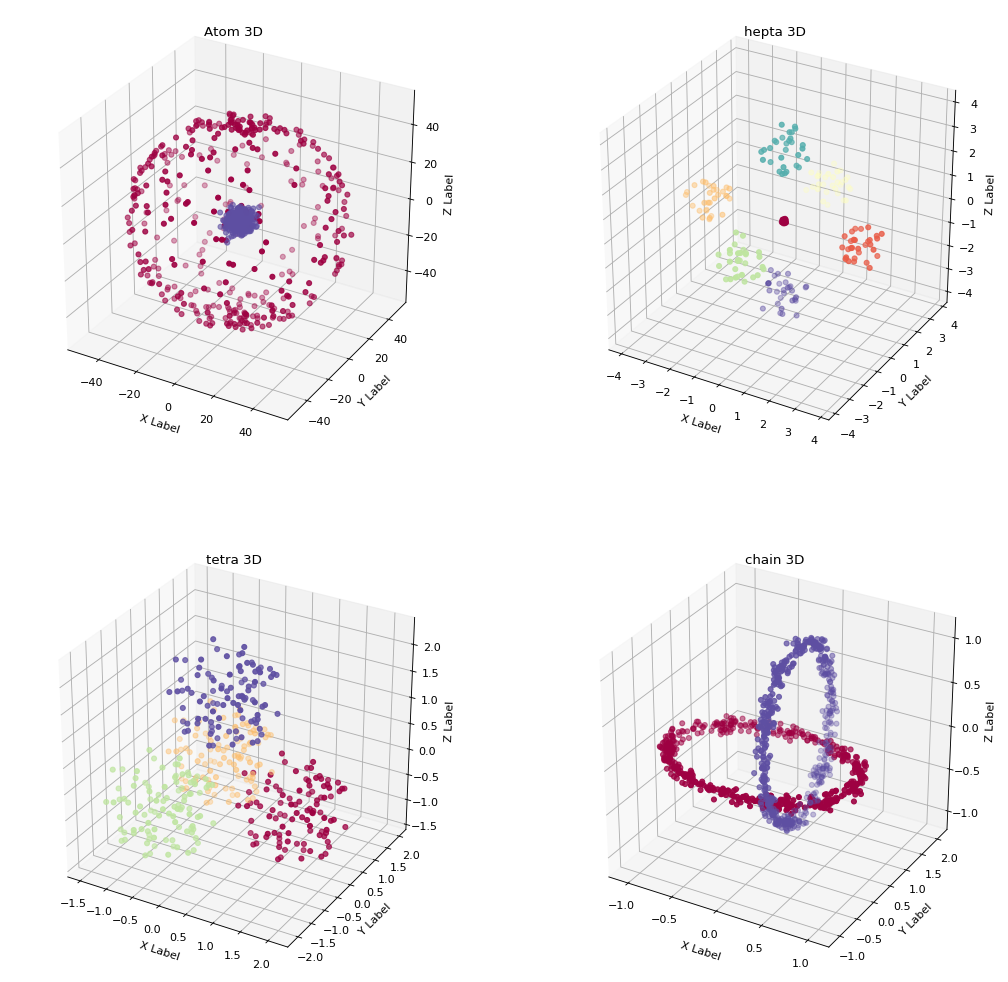

In [46]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


fig = plt.figure(num=None, figsize=(16, 16), dpi=80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(221, projection='3d')
ax.scatter(atom['fea'][:,0], atom['fea'][:,1], atom['fea'][:,2], c=atom['gnd'][:,0], cmap=plt.cm.Spectral)
ax.set_xlabel('X Label'); ax.set_ylabel('Y Label'); ax.set_zlabel('Z Label')
title('Atom 3D')

ax = fig.add_subplot(222, projection='3d')
ax.scatter(hepta['fea'][:,0], hepta['fea'][:,1], hepta['fea'][:,2], c=hepta['gnd'][:,0], cmap=plt.cm.Spectral)
ax.set_xlabel('X Label'); ax.set_ylabel('Y Label'); ax.set_zlabel('Z Label')
title('hepta 3D')

ax = fig.add_subplot(223, projection='3d')
ax.scatter(tetra['fea'][:,0], tetra['fea'][:,1], tetra['fea'][:,2], c=tetra['gnd'][:,0], cmap=plt.cm.Spectral)
ax.set_xlabel('X Label'); ax.set_ylabel('Y Label'); ax.set_zlabel('Z Label')
title('tetra 3D')

ax = fig.add_subplot(224, projection='3d')
ax.scatter(chain['fea'][:,0], chain['fea'][:,1], chain['fea'][:,2], c=chain['gnd'][:,0], cmap=plt.cm.Spectral)
ax.set_xlabel('X Label'); ax.set_ylabel('Y Label'); ax.set_zlabel('Z Label')
title('chain 3D')

plt.show()



### Apply methods

Isomap<br>
PCA<br>
MDS<br>
LLE<br>
Eigen<br>
Deep Autoencoder

In [4]:
atom_scaled = minmax_scale(atom['fea'], axis = 0)
hepta_scaled = minmax_scale(hepta['fea'], axis = 0)
tetra_scaled = minmax_scale(tetra['fea'], axis = 0)
chain_scaled = minmax_scale(chain['fea'], axis = 0)

# Atom

In [102]:
isomap = Isomap(n_components=2).fit_transform(atom['fea']); 
pca = PCA(n_components=2).fit_transform(atom['fea'])
mds = MDS(n_components=2).fit_transform(atom['fea'])
lle = LocallyLinearEmbedding(n_components=2, n_neighbors= 80, eigen_solver='dense').fit_transform(atom['fea'])
eigen = method = LocallyLinearEmbedding(n_components=2,  n_neighbors=80, method='hessian', eigen_solver='dense').fit_transform(atom['fea'])

In [103]:
# Define the AE structure
input_dim = Input(shape = (3, ))
bottleneck = Dense(2, activation = 'elu')(input_dim)
decoded = Dense(3, activation = 'sigmoid')(bottleneck)

# Compile and train the AE
autoencoder = Model(inputs = input_dim, outputs = decoded)
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')
autoencoder.fit(atom_scaled, atom_scaled, epochs = 100, batch_size = 80, shuffle = False, verbose = False
               ,validation_data=(atom_scaled, atom_scaled))

# Extract the compressed Bottleneck representation
encoder = Model(inputs = input_dim, outputs = bottleneck)
encoded_atom = pd.DataFrame(encoder.predict(atom_scaled))
encoded_atom = encoded_atom.add_prefix('feature_')

#atom_scaled = minmax_scale(atom['fea'], axis = 0)
#m = Sequential()
#m.add(Dense(2,  activation='elu', input_shape=(3,), name="bottleneck"))
#m.add(Dense(3,  activation='sigmoid'))
#m.compile(loss='binary_crossentropy', optimizer = Adam())# adadelta 

#history = m.fit(atom_scaled, atom_scaled, batch_size=80, epochs=40, verbose=0, 
#                validation_data=(atom_scaled, atom_scaled))

#encoder = Model(m.input, m.get_layer('bottleneck').output)
#Zenc = encoder.predict(atom_scaled)  # bottleneck representation
#Renc = m.predict(atom_scaled)        # reconstruction

Text(0.5, 1.0, 'Deep AE on Atom')

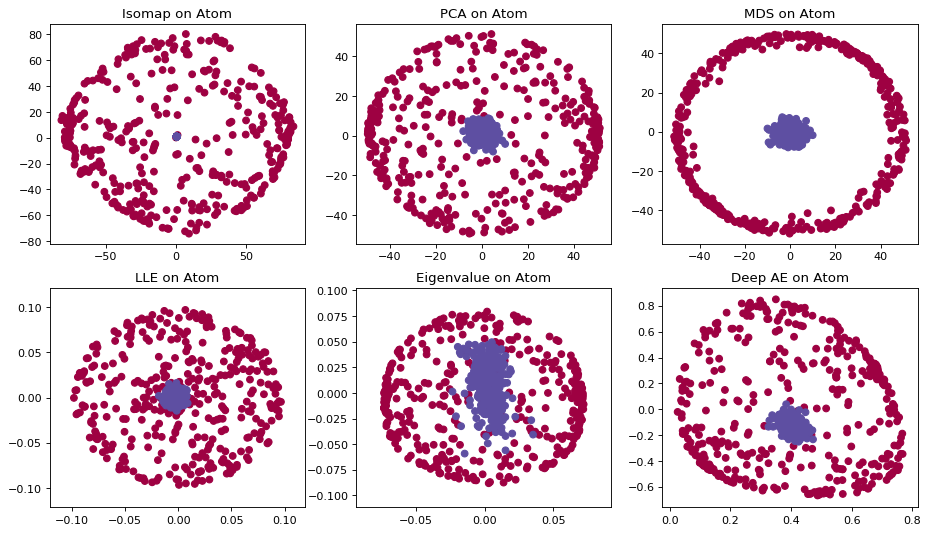

In [104]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
color = atom['gnd'][:,0]
## Isomap
subplot(2, 3, 1)
scatter(isomap[:,0], isomap[:,1], c=color, cmap=plt.cm.Spectral)
title('Isomap on Atom')
## PCA
subplot(2, 3, 2)
scatter(pca[:,0], pca[:,1], c=color, cmap=plt.cm.Spectral)
title('PCA on Atom')
## MDS
subplot(2, 3, 3)
scatter(mds[:,0], mds[:,1], c=color, cmap=plt.cm.Spectral)
title('MDS on Atom')
## LLE
subplot(2, 3, 4)
scatter(lle[:,0], lle[:,1], c=color, cmap=plt.cm.Spectral)
title('LLE on Atom')
## Eigenvalue
subplot(2, 3, 5)
scatter(eigen[:,0], eigen[:,1], c=color, cmap=plt.cm.Spectral)
title('Eigenvalue on Atom')
##
subplot(2, 3, 6)
scatter(encoded_atom.feature_0, encoded_atom.feature_1, c=color, cmap=plt.cm.Spectral)
#scatter(Zenc[:,0], Zenc[:,1], c=color, cmap=plt.cm.Spectral)
title('Deep AE on Atom')


# Hepta

In [99]:
isomap = Isomap(n_components=2).fit_transform(hepta['fea']); 
pca = PCA(n_components=2).fit_transform(hepta['fea'])
mds = MDS(n_components=2).fit_transform(hepta['fea'])
lle = LocallyLinearEmbedding(n_components=2,n_neighbors= 40, eigen_solver='dense').fit_transform(hepta['fea'])
eigen = method = LocallyLinearEmbedding(n_components=2, n_neighbors=40, method='hessian', eigen_solver='dense').fit_transform(hepta['fea'])

In [100]:
# Define the AE structure
input_dim = Input(shape = (3, ))
bottleneck = Dense(2, activation = 'elu')(input_dim)
decoded = Dense(3, activation = 'sigmoid')(bottleneck)

# Compile and train the AE
autoencoder = Model(inputs = input_dim, outputs = decoded)
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')
autoencoder.fit(hepta_scaled, hepta_scaled, epochs = 100, batch_size = 80, shuffle = False, verbose = False
               ,validation_data=(hepta_scaled, hepta_scaled))

# Extract the compressed Bottleneck representation
encoder = Model(inputs = input_dim, outputs = bottleneck)
encoded_atom = pd.DataFrame(encoder.predict(hepta_scaled))
encoded_atom = encoded_atom.add_prefix('feature_')

Text(0.5, 1.0, 'Deep AE on Hepta')

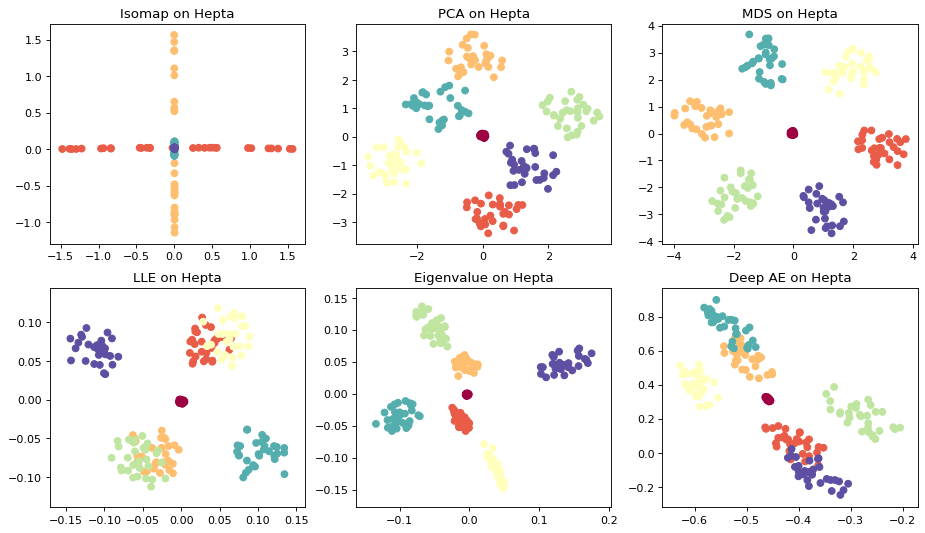

In [101]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
color = hepta['gnd'][:,0]
## Isomap
subplot(2, 3, 1)
scatter(isomap[:,0], isomap[:,1], c=color, cmap=plt.cm.Spectral)
title('Isomap on Hepta')
## PCA
subplot(2, 3, 2)
scatter(pca[:,0], pca[:,1], c=color, cmap=plt.cm.Spectral)
title('PCA on Hepta')
## MDS
subplot(2, 3, 3)
scatter(mds[:,0], mds[:,1], c=color, cmap=plt.cm.Spectral)
title('MDS on Hepta')
## LLE
subplot(2, 3, 4)
scatter(lle[:,0], lle[:,1], c=color, cmap=plt.cm.Spectral)
title('LLE on Hepta')
## Eigenvalue
subplot(2, 3, 5)
scatter(eigen[:,0], eigen[:,1], c=color, cmap=plt.cm.Spectral)
title('Eigenvalue on Hepta')
##
subplot(2, 3, 6)
scatter(encoded_atom.feature_0, encoded_atom.feature_1, c=color, cmap=plt.cm.Spectral)
#scatter(Zenc[:,0], Zenc[:,1], c=color, cmap=plt.cm.Spectral)
title('Deep AE on Hepta')



# Tetra

In [121]:
isomap = Isomap(n_components=2).fit_transform(tetra['fea']); 
pca = PCA(n_components=2).fit_transform(tetra['fea'])
mds = MDS(n_components=2).fit_transform(tetra['fea'])
lle = LocallyLinearEmbedding(n_components=2, n_neighbors= 80, eigen_solver='dense').fit_transform(tetra['fea'])
eigen = method = LocallyLinearEmbedding(n_components=2,  n_neighbors=80, method='hessian', eigen_solver='dense').fit_transform(tetra['fea'])

In [132]:
# Define the AE structure
input_dim = Input(shape = (3, ))
bottleneck = Dense(2, activation = 'tanh')(input_dim)
decoded = Dense(3, activation = 'tanh')(bottleneck)

# Compile and train the AE
autoencoder = Model(inputs = input_dim, outputs = decoded)
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')
autoencoder.fit(tetra_scaled, tetra_scaled, epochs = 150, batch_size = 200, shuffle = False, verbose = False
                ,validation_data=(tetra_scaled, tetra_scaled))

# Extract the compressed Bottleneck representation
encoder = Model(inputs = input_dim, outputs = bottleneck)
encoded_atom = pd.DataFrame(encoder.predict(tetra_scaled))
encoded_atom = encoded_atom.add_prefix('feature_')

Text(0.5, 1.0, 'Deep AE on Hepta')

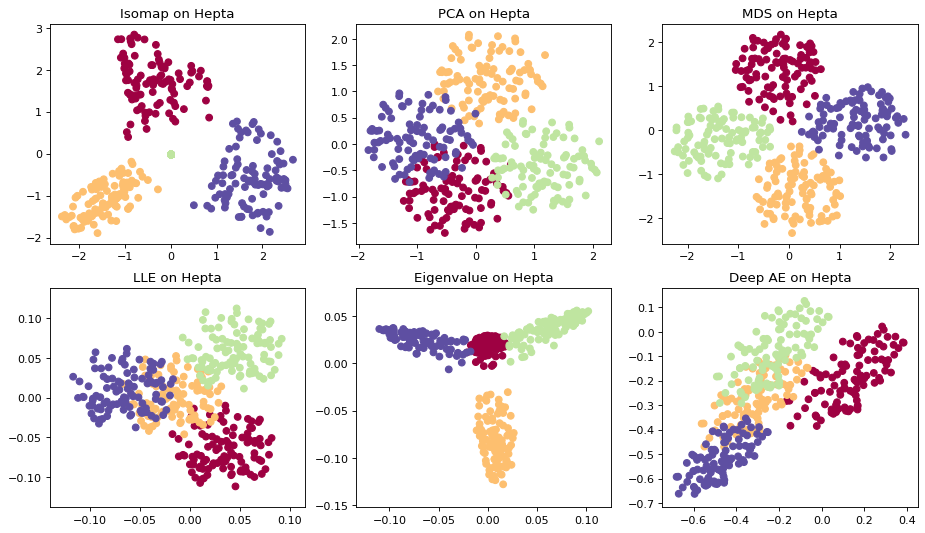

In [133]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
color = tetra['gnd'][:,0]
## Isomap
subplot(2, 3, 1)
scatter(isomap[:,0], isomap[:,1], c=color, cmap=plt.cm.Spectral)
title('Isomap on Hepta')
## PCA
subplot(2, 3, 2)
scatter(pca[:,0], pca[:,1], c=color, cmap=plt.cm.Spectral)
title('PCA on Hepta')
## MDS
subplot(2, 3, 3)
scatter(mds[:,0], mds[:,1], c=color, cmap=plt.cm.Spectral)
title('MDS on Hepta')
## LLE
subplot(2, 3, 4)
scatter(lle[:,0], lle[:,1], c=color, cmap=plt.cm.Spectral)
title('LLE on Hepta')
## Eigenvalue
subplot(2, 3, 5)
scatter(eigen[:,0], eigen[:,1], c=color, cmap=plt.cm.Spectral)
title('Eigenvalue on Hepta')
##
subplot(2, 3, 6)
scatter(encoded_atom.feature_0, encoded_atom.feature_1, c=color, cmap=plt.cm.Spectral)
#scatter(Zenc[:,0], Zenc[:,1], c=color, cmap=plt.cm.Spectral)
title('Deep AE on Hepta')



# Chain

In [422]:
isomap = Isomap(n_components=2).fit_transform(chain['fea']); 
pca = PCA(n_components=2).fit_transform(chain['fea'])
mds = MDS(n_components=2).fit_transform(chain['fea'])
lle = LocallyLinearEmbedding(n_components=2, n_neighbors= 200, eigen_solver='dense').fit_transform(chain['fea'])
eigen = method = LocallyLinearEmbedding(n_components=2,  n_neighbors=200, method='hessian', eigen_solver='dense').fit_transform(chain['fea'])

In [425]:
# Define the AE structure
input_dim = Input(shape = (3, ))
bottleneck = Dense(2, activation = 'tanh')(input_dim)
decoded = Dense(3, activation = 'tanh')(bottleneck)

# Compile and train the AE
autoencoder = Model(inputs = input_dim, outputs = decoded)
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')
autoencoder.fit(chain_scaled, chain_scaled, epochs = 100, batch_size = 80, shuffle = False, verbose = False
                ,validation_data=(chain_scaled, chain_scaled))

# Extract the compressed Bottleneck representation
encoder = Model(inputs = input_dim, outputs = bottleneck)
encoded_atom = pd.DataFrame(encoder.predict(chain_scaled))
encoded_atom = encoded_atom.add_prefix('feature_')

Text(0.5, 1.0, 'Deep AE on Hepta')

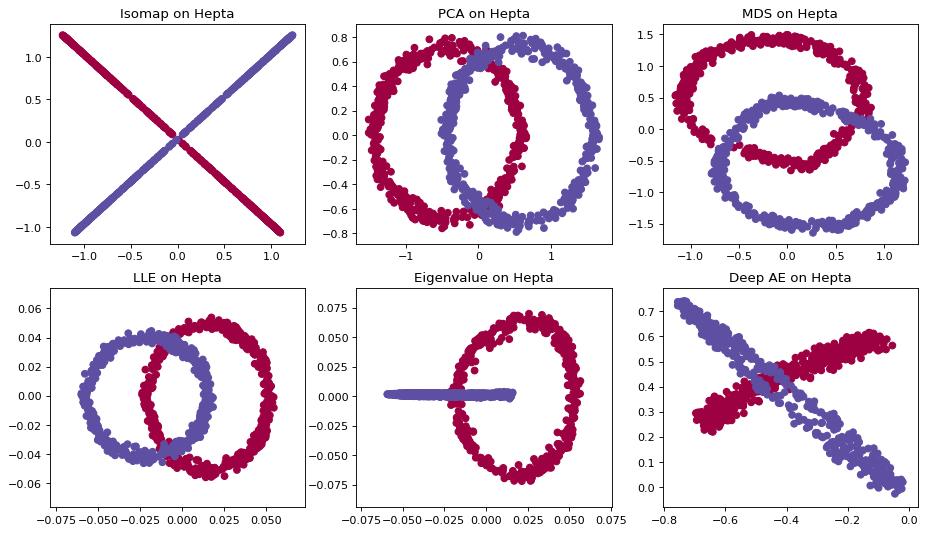

In [426]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
color = chain['gnd'][:,0]
## Isomap
subplot(2, 3, 1)
scatter(isomap[:,0], isomap[:,1], c=color, cmap=plt.cm.Spectral)
title('Isomap on Hepta')
## PCA
subplot(2, 3, 2)
scatter(pca[:,0], pca[:,1], c=color, cmap=plt.cm.Spectral)
title('PCA on Hepta')
## MDS
subplot(2, 3, 3)
scatter(mds[:,0], mds[:,1], c=color, cmap=plt.cm.Spectral)
title('MDS on Hepta')
## LLE
subplot(2, 3, 4)
scatter(lle[:,0], lle[:,1], c=color, cmap=plt.cm.Spectral)
title('LLE on Hepta')
## Eigenvalue
subplot(2, 3, 5)
scatter(eigen[:,0], eigen[:,1], c=color, cmap=plt.cm.Spectral)
title('Eigenvalue on Hepta')
##
subplot(2, 3, 6)
scatter(encoded_atom.feature_0, encoded_atom.feature_1, c=color, cmap=plt.cm.Spectral)
#scatter(Zenc[:,0], Zenc[:,1], c=color, cmap=plt.cm.Spectral)
title('Deep AE on Hepta')


# Algorithm Implementation 

### Define LLE functions

Compute k nearest neighbors

In [5]:
def Knbor_Mat(X, K, t = 2.0, dist_metric = "euclidean", algorithm = "ball_tree"):
    
    n,p = X.shape
    
    knn = neighbors.NearestNeighbors(K+1, metric = dist_metric, algorithm=algorithm).fit(X)
    distances, nbors = knn.kneighbors(X)
    
    return(nbors[:,1:])

Compute the Weights Matrix 

In [6]:
from scipy.linalg import solve
def get_weights(X, nbors, reg, K):
    
    n,p = X.shape
    
    Weights = np.zeros((n,n))
    
    for i in range(n):
        
        X_bors = X[nbors[i],:] - X[i]
        cov_nbors = np.dot(X_bors, X_bors.T)
        
        #regularization tems
        trace = np.trace(cov_nbors)
        if trace >0 :
            R = reg*trace
        else:
            R = reg
        
        cov_nbors.flat[::K+1] += R
        weights = solve(cov_nbors, np.ones(K).T, sym_pos=True)

        weights = weights/weights.sum()
        Weights[i, nbors[i]] = weights
        
    return(Weights)

Calculate the new embedding

In [7]:
from scipy.linalg import eigh

def Y_(Weights,d):
    n,p = Weights.shape
    I = np.eye(n)
    m = (I-Weights)
    M = m.T.dot(m)
    
    eigvals, eigvecs = eigh(M, eigvals=(1, d), overwrite_a=True)
    ind = np.argsort(np.abs(eigvals))
    
    return(eigvecs[:, ind])

### Define AE loss function

In [76]:
def custom_loss(bottleneck, W, lamb):
    def loss(y_true,y_pred):
        k = keras.losses.mean_squared_error(y_true, y_pred)
        ll = lamb * keras.losses.mean_squared_error(bottleneck, tf.tensordot(W,bottleneck,1))
        return k + ll
    # Return a function
    return loss

## Import MNIST Dataset

In [115]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [10]:
orl = scipy.io.loadmat('data/ORL_32x32.mat')
yale = scipy.io.loadmat('data/YALE_32x32.mat')
usps = scipy.io.loadmat('data/USPS.mat')
coil20 = scipy.io.loadmat('data/COIL20.mat')
coil100 = scipy.io.loadmat('data/COIL100.mat')

# Coil 20

In [427]:
data = coil20['fea']
color = coil20['gnd'][:,0]

isomap = Isomap(n_components=2).fit_transform(data); 
pca = PCA(n_components=2).fit_transform(data)
mds = MDS(n_components=2).fit_transform(data)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors= 200, eigen_solver='dense').fit_transform(data)
eigen = method = LocallyLinearEmbedding(n_components=2,  n_neighbors=200, method='hessian', eigen_solver='dense').fit_transform(data)

Text(0.5, 1.0, 'Eigenvalue on Hepta')

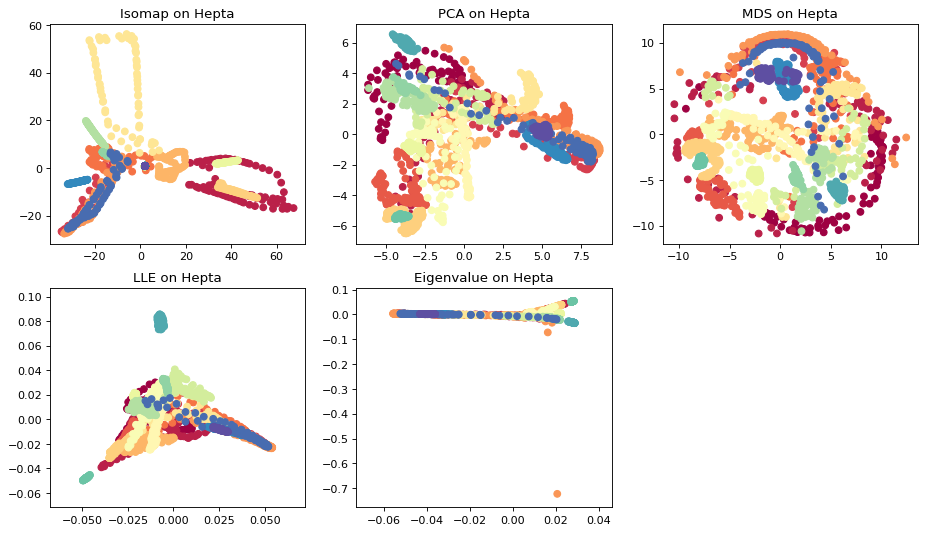

In [428]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')

## Isomap
subplot(2, 3, 1)
scatter(isomap[:,0], isomap[:,1], c=color, cmap=plt.cm.Spectral)
title('Isomap on Hepta')
## PCA
subplot(2, 3, 2)
scatter(pca[:,0], pca[:,1], c=color, cmap=plt.cm.Spectral)
title('PCA on Hepta')
## MDS
subplot(2, 3, 3)
scatter(mds[:,0], mds[:,1], c=color, cmap=plt.cm.Spectral)
title('MDS on Hepta')
## LLE
subplot(2, 3, 4)
scatter(lle[:,0], lle[:,1], c=color, cmap=plt.cm.Spectral)
title('LLE on Hepta')
## Eigenvalue
subplot(2, 3, 5)
scatter(eigen[:,0], eigen[:,1], c=color, cmap=plt.cm.Spectral)
title('Eigenvalue on Hepta')


### Test with our approach 

In [109]:
data = coil20['fea']
color = coil20['gnd'][:,0]

## After many tests we constate that with one layer we have the best results
input_dim = Input(shape = (len(data[0]), ))
encoded = Dense(800, activation = 'linear')(input_dim)
encoded1 = Dense(500, activation = 'linear')(encoded)
encoded2 = Dense(250, activation = 'linear')(encoded1)
encoded3 = Dense(120, activation = 'linear')(encoded2)
bottleneck = Dense(20, activation = 'linear')(encoded3)
decoded1 = Dense(120, activation = 'linear')(bottleneck)
decoded2 = Dense(250, activation = 'linear')(decoded1)
decoded3 = Dense(500, activation = 'linear')(decoded2)
decoded4 = Dense(800, activation = 'linear')(decoded3)
decoded = Dense(len(data[0]), activation = 'sigmoid')(decoded4)

# To avoid overfeeting, we cut after 3 epochs fo non significative difference 
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=0, mode='auto')

autoencoder = Model(inputs = input_dim, outputs = decoded)
autoencoder.compile(optimizer = 'Adadelta', loss = 'mean_squared_error')
autoencoder.fit(data, data, 
                callbacks=[early_stop],
                epochs = 30, 
                batch_size = len(data), 
                shuffle = True,
                verbose = 0,
                validation_data=(data, data))

encoder_ = Model(inputs = input_dim, outputs = bottleneck)
encoder_orl = pd.DataFrame(encoder_.predict(data))

In [152]:
k = 80
reg = 0.0001
nbors = Knbor_Mat(encoder_orl.values,k)
W = tf.convert_to_tensor(get_weights(encoder_orl.values, nbors, reg, k),dtype=tf.float32)
lamb = 1 #lambda for the loss function
nn = 2

for i in range(nn):
    print('Iteration :',i+1,'/',nn)
    autoencoder.compile(optimizer = 'Adadelta', loss = custom_loss(bottleneck, W, lamb))
    autoencoder.fit(data, data, 
                    epochs = 30, 
                    batch_size = len(data), 
                    shuffle = True,
                    verbose = 0,
                    callbacks=[early_stop],
                    validation_data=(data, data))
    encoder_ = Model(inputs = input_dim, outputs = bottleneck)
    encoder_orl = pd.DataFrame(encoder_.predict(data))
    nbors = Knbor_Mat(encoder_orl.values,k)
    W = tf.convert_to_tensor(get_weights(encoder_orl.values, nbors, reg, k),dtype=tf.float32)

Iteration : 1 / 2
Iteration : 2 / 2


Text(0.5, 1.0, 'Deep AE on Atom')

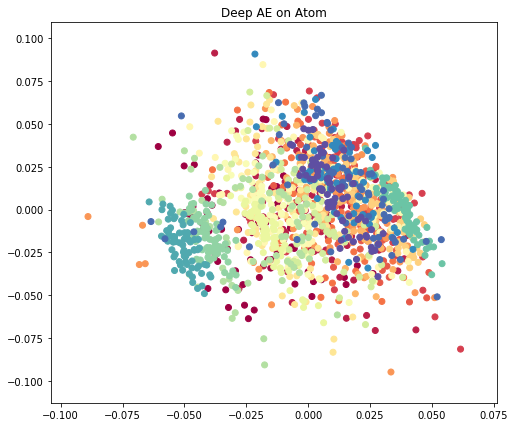

In [153]:
plt.figure(figsize=(8,7))

Y = Y_(W.numpy(),2)

scatter(Y[:,0], Y[:,1], c=color, cmap=plt.cm.Spectral)
title('Deep AE on Atom')

# Coil100

In [169]:
data = coil100['fea']/ 255.
color = coil100['gnd'][:,0]

input_dim = Input(shape = (len(data[0]), ))
encoded = Dense(800, activation = 'linear')(input_dim)
encoded1 = Dense(500, activation = 'linear')(encoded)
encoded2 = Dense(250, activation = 'linear')(encoded1)
encoded3 = Dense(120, activation = 'linear')(encoded2)
bottleneck = Dense(20, activation = 'linear')(encoded3)
decoded1 = Dense(120, activation = 'linear')(bottleneck)
decoded2 = Dense(250, activation = 'linear')(decoded1)
decoded3 = Dense(500, activation = 'linear')(decoded2)
decoded4 = Dense(800, activation = 'linear')(decoded3)
decoded = Dense(len(data[0]), activation = 'sigmoid')(decoded4)

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=0, mode='auto')

autoencoder = Model(inputs = input_dim, outputs = decoded)
autoencoder.compile(optimizer = 'Adadelta', loss = 'mean_squared_error')
autoencoder.fit(data, data, 
                callbacks=[early_stop],
                epochs = 30, 
                batch_size = len(data), 
                shuffle = True,
                verbose = 0,
                validation_data=(data, data))

encoder_ = Model(inputs = input_dim, outputs = bottleneck)
encoder_orl = pd.DataFrame(encoder_.predict(data))

In [172]:
k = 380
reg = 0.0001
nbors = Knbor_Mat(encoder_orl.values,k)
W = tf.convert_to_tensor(get_weights(encoder_orl.values, nbors, reg, k),dtype=tf.float32)
lamb = 1
nn = 2

for i in range(nn):
    print('Iteration :',i+1,'/',nn)
    autoencoder.compile(optimizer = 'Adadelta', loss = custom_loss(bottleneck, W, lamb))
    autoencoder.fit(data, data, 
                    epochs = 40, 
                    batch_size = len(data), 
                    shuffle = True,
                    verbose = 0,
                    callbacks=[early_stop],
                    validation_data=(data, data))
    encoder_ = Model(inputs = input_dim, outputs = bottleneck)
    encoder_orl = pd.DataFrame(encoder_.predict(data))
    nbors = Knbor_Mat(encoder_orl.values,k)
    W = tf.convert_to_tensor(get_weights(encoder_orl.values, nbors, reg, k),dtype=tf.float32)

Iteration : 1 / 2
Iteration : 2 / 2


Text(0.5, 1.0, 'Deep AE on Atom')

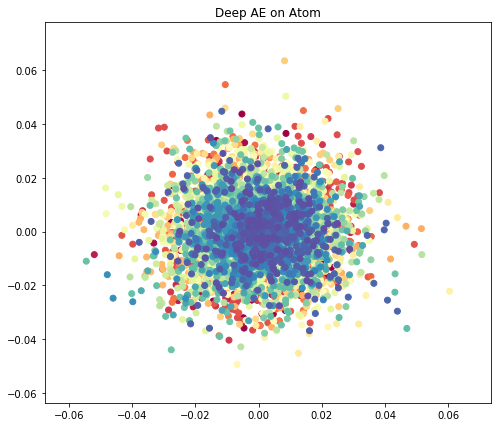

In [173]:
plt.figure(figsize=(8,7))

Y = Y_(W.numpy(),2)

scatter(Y[:,0], Y[:,1], c=color, cmap=plt.cm.Spectral)
title('Deep AE on Atom')

## Perform Clustering

Text(0.5, 1.0, 'Kmeans clustering')

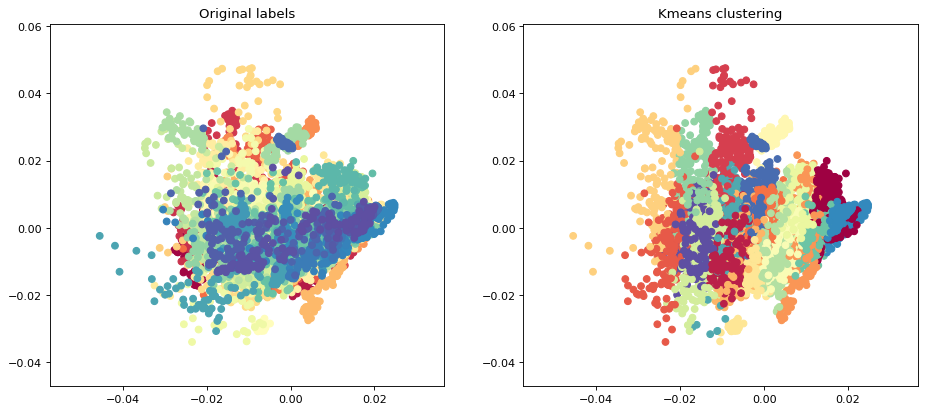

In [653]:
kmeans = KMeans(n_clusters=20, random_state=0).fit(encoder_orl)

figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
## 
subplot(1, 2, 1)
scatter(Y[:,0], Y[:,1], c=color, cmap=plt.cm.Spectral)
title('Original labels')
## PCA
subplot(1, 2, 2)
scatter(Y[:,0], Y[:,1], c=kmeans.labels_, cmap=plt.cm.Spectral)
title('Kmeans clustering')

# Yale

In [224]:
data = yale['fea'] / 255.
color = yale['gnd'][:,0]

isomap = Isomap(n_components=2).fit_transform(data); 
pca = PCA(n_components=2).fit_transform(data)
mds = MDS(n_components=2).fit_transform(data)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors= 20, eigen_solver='dense').fit_transform(data)
eigen = method = LocallyLinearEmbedding(n_components=2,  n_neighbors=20, method='hessian', eigen_solver='dense').fit_transform(data)

Text(0.5, 1.0, 'Eigenvalue on Hepta')

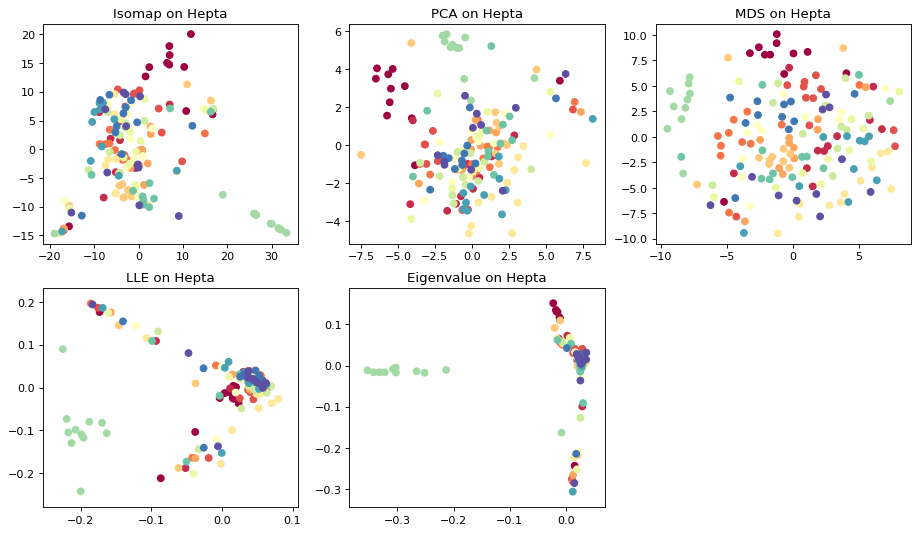

In [225]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')

## Isomap
subplot(2, 3, 1)
scatter(isomap[:,0], isomap[:,1], c=color, cmap=plt.cm.Spectral)
title('Isomap on Hepta')
## PCA
subplot(2, 3, 2)
scatter(pca[:,0], pca[:,1], c=color, cmap=plt.cm.Spectral)
title('PCA on Hepta')
## MDS
subplot(2, 3, 3)
scatter(mds[:,0], mds[:,1], c=color, cmap=plt.cm.Spectral)
title('MDS on Hepta')
## LLE
subplot(2, 3, 4)
scatter(lle[:,0], lle[:,1], c=color, cmap=plt.cm.Spectral)
title('LLE on Hepta')
## Eigenvalue
subplot(2, 3, 5)
scatter(eigen[:,0], eigen[:,1], c=color, cmap=plt.cm.Spectral)
title('Eigenvalue on Hepta')

In [244]:
data = yale['fea']/ 255.
color = yale['gnd'][:,0]

input_dim = Input(shape = (len(data[0]), ))
encoded = Dense(800, activation = 'sigmoid')(input_dim)
encoded1 = Dense(500, activation = 'sigmoid')(encoded)
encoded2 = Dense(250, activation = 'sigmoid')(encoded1)
encoded3 = Dense(120, activation = 'sigmoid')(encoded2)
encoded4 = Dense(80, activation = 'sigmoid')(encoded3)
encoded5 = Dense(40, activation = 'sigmoid')(encoded4)
bottleneck = Dense(15, activation = 'linear')(encoded5)
decoded1 = Dense(40, activation = 'sigmoid')(bottleneck)
decoded2 = Dense(80, activation = 'sigmoid')(decoded1)
decoded3 = Dense(120, activation = 'sigmoid')(decoded2)
decoded4 = Dense(250, activation = 'sigmoid')(decoded3)
decoded5 = Dense(500, activation = 'sigmoid')(decoded4)
decoded6 = Dense(800, activation = 'sigmoid')(decoded5)
decoded = Dense(len(data[0]), activation = 'sigmoid')(decoded6)

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=0, mode='auto')

autoencoder = Model(inputs = input_dim, outputs = decoded)
autoencoder.compile(optimizer = 'Adadelta', loss = 'mean_squared_error')
autoencoder.fit(data, data, 
                callbacks=[early_stop],
                epochs = 30, 
                batch_size = len(data), 
                shuffle = True,
                verbose = 0,
                validation_data=(data, data))

encoder_ = Model(inputs = input_dim, outputs = bottleneck)
encoder_orl = pd.DataFrame(encoder_.predict(data))

In [247]:
k = 20
reg = 0.0001
nbors = Knbor_Mat(encoder_orl.values,k)
W = tf.convert_to_tensor(get_weights(encoder_orl.values, nbors, reg, k),dtype=tf.float32)
lamb = 1.5
nn = 2

for i in range(nn):
    print('Iteration :',i+1,'/',nn)
    autoencoder.compile(optimizer = 'Adadelta', loss = custom_loss(bottleneck, W, lamb))
    autoencoder.fit(data, data, 
                    epochs = 50, 
                    batch_size = len(data), 
                    shuffle = True,
                    verbose = 0,
                    callbacks=[early_stop],
                    validation_data=(data, data))
    encoder_ = Model(inputs = input_dim, outputs = bottleneck)
    encoder_orl = pd.DataFrame(encoder_.predict(data))
    nbors = Knbor_Mat(encoder_orl.values,k)
    W = tf.convert_to_tensor(get_weights(encoder_orl.values, nbors, reg, k),dtype=tf.float32)

Iteration : 1 / 2
Iteration : 2 / 2


Text(0.5, 1.0, 'Deep AE on Atom')

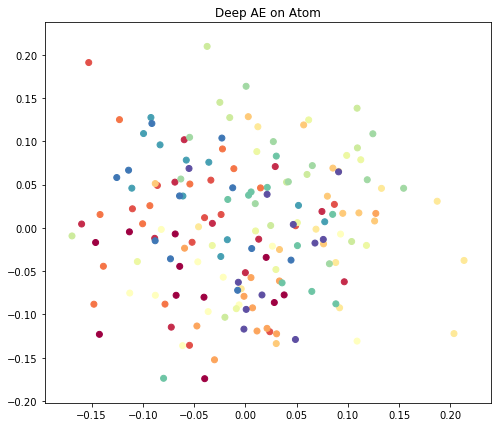

In [259]:
plt.figure(figsize=(8,7))

Y = Y_(W.numpy(),2)

scatter(Y[:,0], Y[:,1], c=color, cmap=plt.cm.Spectral)
title('Deep AE on Atom')

# ORL

In [517]:
data = orl['fea']/ 255.
color = orl['gnd'][:,0]

isomap = Isomap(n_components=2).fit_transform(data); 
pca = PCA(n_components=2).fit_transform(data)
mds = MDS(n_components=2).fit_transform(data)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors= 20, eigen_solver='dense').fit_transform(data)
eigen = method = LocallyLinearEmbedding(n_components=2,  n_neighbors=20, method='hessian', eigen_solver='dense').fit_transform(data)

Text(0.5, 1.0, 'Eigenvalue on Hepta')

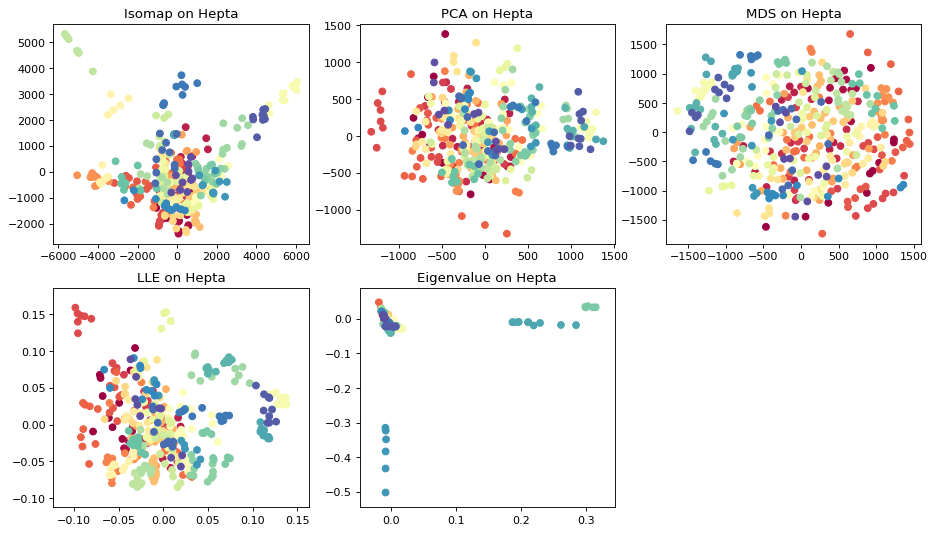

In [518]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')

## Isomap
subplot(2, 3, 1)
scatter(isomap[:,0], isomap[:,1], c=color, cmap=plt.cm.Spectral)
title('Isomap on Hepta')
## PCA
subplot(2, 3, 2)
scatter(pca[:,0], pca[:,1], c=color, cmap=plt.cm.Spectral)
title('PCA on Hepta')
## MDS
subplot(2, 3, 3)
scatter(mds[:,0], mds[:,1], c=color, cmap=plt.cm.Spectral)
title('MDS on Hepta')
## LLE
subplot(2, 3, 4)
scatter(lle[:,0], lle[:,1], c=color, cmap=plt.cm.Spectral)
title('LLE on Hepta')
## Eigenvalue
subplot(2, 3, 5)
scatter(eigen[:,0], eigen[:,1], c=color, cmap=plt.cm.Spectral)
title('Eigenvalue on Hepta')

In [260]:
data = orl['fea']/ 255.
color = orl['gnd'][:,0]

input_dim = Input(shape = (len(data[0]), ))
encoded2 = Dense(500, activation = 'linear')(input_dim)
encoded3 = Dense(200, activation = 'linear')(encoded2)
encoded4 = Dense(100, activation = 'linear')(encoded3)
bottleneck = Dense(40, activation = 'linear')(encoded4)
decoded1 = Dense(100, activation = 'linear')(bottleneck)
decoded2 = Dense(200, activation = 'linear')(decoded1)
decoded3 = Dense(500, activation = 'linear')(decoded2)
decoded = Dense(len(data[0]), activation = 'sigmoid')(decoded3)

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=0, mode='auto')

autoencoder = Model(inputs = input_dim, outputs = decoded)
autoencoder.compile(optimizer = 'Adagrad', loss = 'mean_squared_error')
autoencoder.fit(data, data, 
                callbacks=[early_stop],
                epochs = 30, 
                batch_size = len(data), 
                shuffle = True,
                verbose = 0,
                validation_data=(data, data))

encoder_ = Model(inputs = input_dim, outputs = bottleneck)
encoder_orl = pd.DataFrame(encoder_.predict(data))

In [312]:
k = 20
reg = 0.0001
nbors = Knbor_Mat(encoder_orl.values,k)
W = tf.convert_to_tensor(get_weights(encoder_orl.values, nbors, reg, k),dtype=tf.float32)
lamb = 3

for i in range(3):
    autoencoder.compile(optimizer = 'Adam', loss = custom_loss(bottleneck, W, lamb))
    autoencoder.fit(data, data, 
                    epochs = 40, 
                    batch_size = len(data), 
                    shuffle = True,
                    verbose = 0,
                    callbacks=[early_stop],
                    validation_data=(data, data))
    encoder_ = Model(inputs = input_dim, outputs = bottleneck)
    encoder_orl = pd.DataFrame(encoder_.predict(data))
    nbors = Knbor_Mat(encoder_orl.values,k)
    W = tf.convert_to_tensor(get_weights(encoder_orl.values, nbors, reg, k),dtype=tf.float32)

Text(0.5, 1.0, 'Deep AE on Atom')

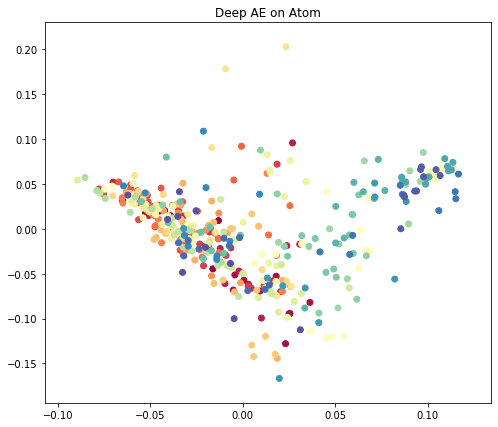

In [313]:
plt.figure(figsize=(8,7))

Y = Y_(W.numpy(),2)

scatter(Y[:,0], Y[:,1], c=color, cmap=plt.cm.Spectral)
title('Deep AE on Atom')

In [314]:
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import adjusted_mutual_info_score
kmeans = KMeans(n_clusters=40, random_state=0).fit(encoder_orl.values)
print(normalized_mutual_info_score(color,kmeans.labels_))
print(adjusted_mutual_info_score(color,kmeans.labels_))

0.559532771295638
0.28028188966771544


In [309]:
mds = MDS(n_components=40).fit_transform(data)
kmeans = KMeans(n_clusters=40, random_state=0).fit(mds)
print(normalized_mutual_info_score(color,kmeans.labels_))
print(adjusted_mutual_info_score(color,kmeans.labels_))

0.7761988387440002
0.6265698799545534


In [310]:
pca = PCA(n_components=40).fit_transform(data)
kmeans = KMeans(n_clusters=40, random_state=0).fit(pca)
print(normalized_mutual_info_score(color,kmeans.labels_))
print(adjusted_mutual_info_score(color,kmeans.labels_))

0.7775324272940389
0.6298206059163044
